In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
data = pd.read_csv('c:/users/ACER/desktop/CAR-DETAILS-FROM-CAR-DEKHO.csv')


In [16]:
data.shape

(4340, 8)

In [21]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [22]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


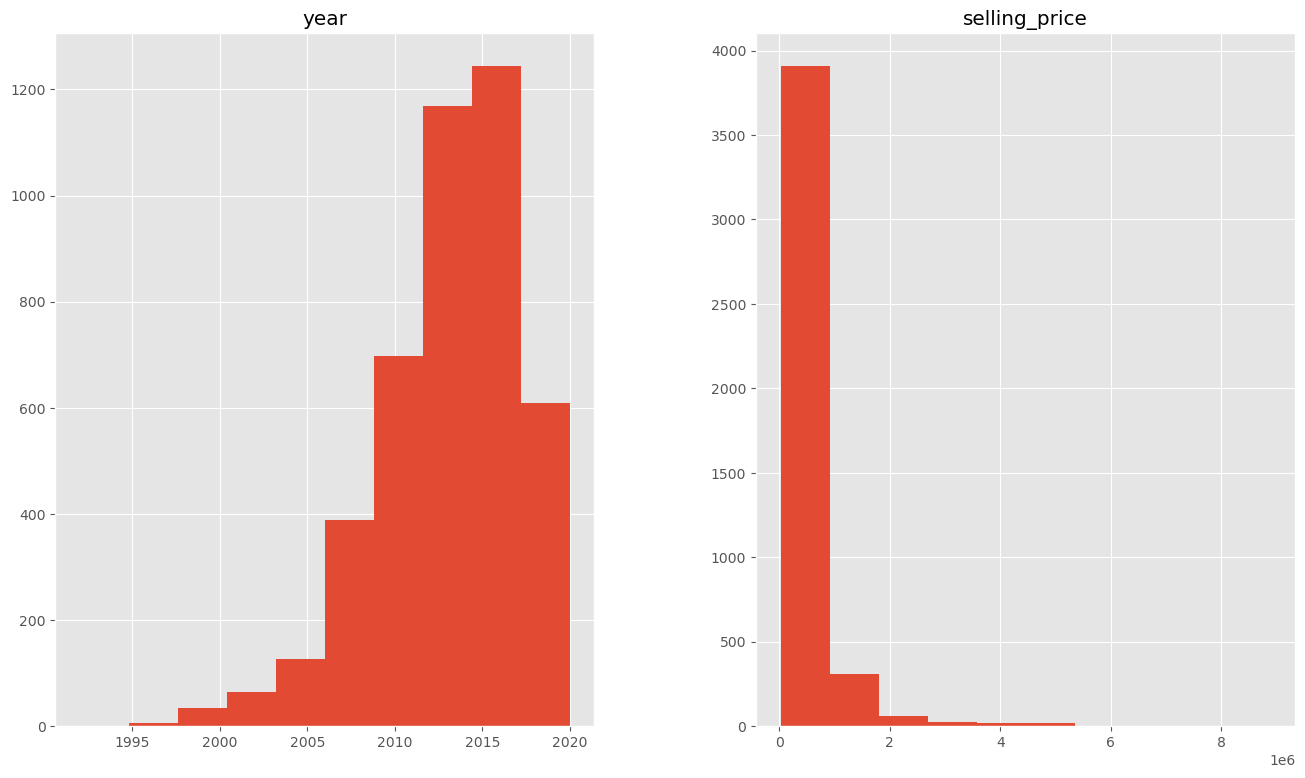

In [57]:
data.drop(['name','fuel','km_driven'],axis=1).hist()
plt.show()


In [70]:
import matplotlib.pyplot as plt
import pandas as pd


# Imprimir primeras filas y tipos
print("Primeras filas:")
print(data.head())
print("\nTipos de datos:")
print(data.dtypes)

# Verificar valores nulos
print("\nValores nulos por columna:")
print(data[['selling_price', 'year']].isnull().sum())

# Limpiar datos
data = data.dropna(subset=['selling_price', 'year'])
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Verifica rangos reales
print("\nResumen estadístico:")
print(data[['selling_price', 'year']].describe())

# Filtrar con valores más amplios
filtered_data = data[(data['selling_price'] < 100) & (data['year'] <= 2020)]

Primeras filas:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007        60000.0      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007       135000.0      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012       600000.0     100000  Diesel   
3    Datsun RediGO T Option  2017       250000.0      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014       450000.0     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Tipos de datos:
name              object
year               int32
selling_price    float64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
dtype: object

Valores nulos por columna:
selling_price    0
year             0
dt

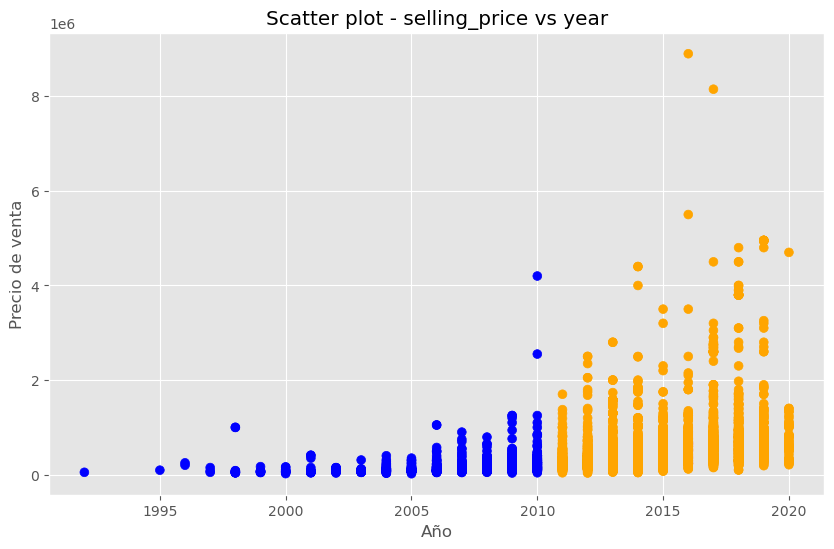

In [85]:
import matplotlib.pyplot as plt

# Extraer columnas
f1 = data['selling_price'].values
f2 = data['year'].values

# Asignar colores: naranja si el año es mayor a 2010
colores = ['orange' if year > 2010 else 'blue' for year in f2]

# Graficar: año en eje X, precio en eje Y
plt.figure(figsize=(10, 6))
plt.scatter(f2, f1, c=colores, s=40)
plt.xlabel("Año")
plt.ylabel("Precio de venta")
plt.title("Scatter plot - selling_price vs year")
plt.grid(True)
plt.show()

In [104]:
predictors_col = ["year", "km_driven"]
target_col = ['selling_price']

In [105]:
predictors = data[predictors_col]
target = data[target_col]

In [106]:
predictors

,year,km_driven
0,2007,70000
1,2007,50000
2,2012,100000
3,2017,46000
4,2014,141000
...,...,...
4335,2014,80000
4336,2014,80000
4337,2009,83000
4338,2016,90000


In [107]:
target

,selling_price
0,60000.0
1,135000.0
2,600000.0
3,250000.0
4,450000.0
...,...
4335,409999.0
4336,409999.0
4337,110000.0
4338,865000.0


In [170]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [171]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

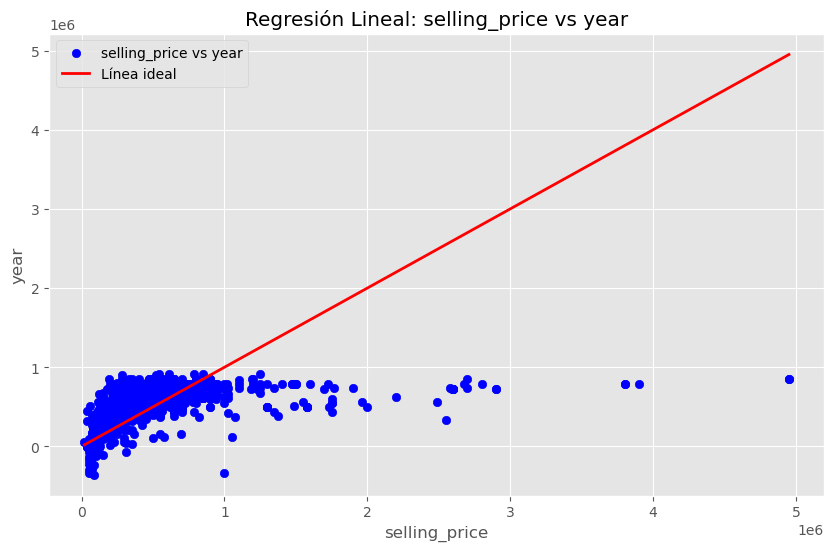

In [172]:
import matplotlib.pyplot as plt

# 1. Hacemos las predicciones
predicciones = modelo.predict(X_test)

# 2. Mostramos una gráfica de dispersión (valores reales) vs línea de regresión (valores predichos)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, color='blue', label='selling_price vs year')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Línea ideal')
plt.xlabel('selling_price')
plt.ylabel('year')
plt.title('Regresión Lineal: selling_price vs year')
plt.legend()
plt.grid(True)
plt.show()

In [173]:
y_pred = modelo.predict(X_test)


In [177]:
import numpy as np

print("\nCoeficientes del modelo:")
for nombre, coef in zip(X.columns, modelo.coef_):
    # Asegurarse que sea un número escalar
    valor = coef[0] if isinstance(coef, (np.ndarray, list)) else coef
    print(f"{nombre}: {valor:.2f}")

intercepto = modelo.intercept_
intercepto_valor = intercepto[0] if isinstance(intercepto, (np.ndarray, list)) else intercepto
print(f"\nIntercepto: {intercepto_valor:.2f}")

print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coeficiente de determinación (R²): {r2_score(y_test, y_pred):.2f}")


Coeficientes del modelo:
year: 56151.44

Intercepto: -112516823.88
Error cuadrático medio (MSE): 226084426376.50
Coeficiente de determinación (R²): 0.19


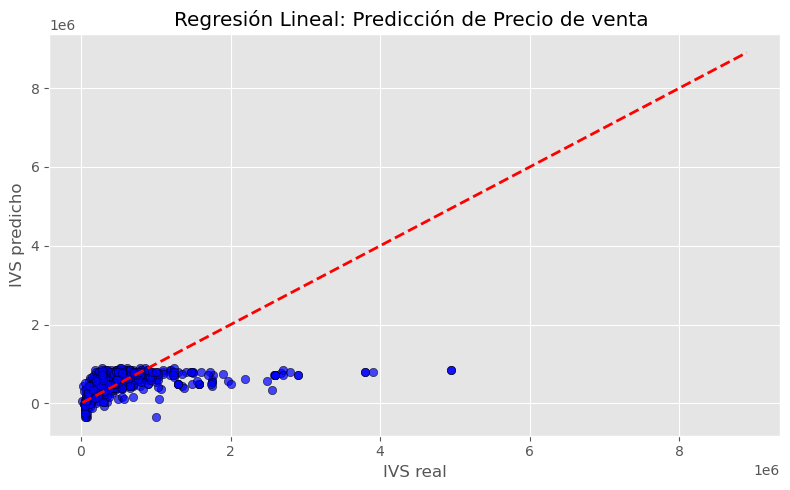

In [181]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("IVS real")
plt.ylabel("IVS predicho")
plt.title("Regresión Lineal: Predicción de Precio de venta ")
plt.grid(True)
plt.tight_layout()
plt.show()
